In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print('Setup successful!')

Setup successful!


In [2]:
df= pd.read_csv('diamonds_prices.csv')
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


A coluna de nome 'Unnamed: 0' se trata de uma coluna de index, logo não precisa-se dela e fiz o drop.

**Dicionário dos Dados**

carat: massa do diamante. 1 carat (ou quilate) equivale a 200 miligramas;

cut: se refere a qualidade do corte do diamante;

color: escala de cor dos diamantes, quanto maior (em ordem alfabética) a letra, mais claro o diamante;

clarity: escala de inclusões (manchas, marcas) no diamante;

depth: profundidade, calculado como a proporção entre altura e largura do diamante, expressa em porcentagem;

table: face plana do diamante, expressa em porcentagem;

price: preço;
x, y, z: dimensões do diamante em milímetros.





In [ ]:
df.shape

(53943, 10)

Através do shape vemos que o dataset é composto por 53943 linhas e 10 colunas. Cada linha representa um diamante de lapidação redonda e as colunas representam os atributos de cada diamante.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Verificamos que existem 6 variáveis numéricas contínuas, uma variável numérica discreta e 3 variáveis categóricas. Além disso podemos constatar que não há valores nulos no dataset.

In [ ]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
for i in df.columns:
  print(i, df[i].nunique())

carat 273
cut 5
color 7
clarity 8
depth 184
table 127
price 11602
x 554
y 552
z 375


Através do código acima pode-se verificar os valores únicos por coluna do Dataframe. As dimensões x,y e z dos diamantes não apresentam muita variabilidade se compararmos com o total de amostras disponíveis.

In [ ]:
df.price.describe()

count    53943.000000
mean      3932.734294
std       3989.338447
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.000000
max      18823.000000
Name: price, dtype: float64

Através do decribe() podemos ver que o preço médio dos diamantes (em Euro) é igual a $3932,73  e madiana igual a $2401,00. Também vemos que o desvio padrão é elevado ($3989,33), ou seja, há uma grande variação dos preços com relação à média.
Vamos plotar um histograma e um boxplot para entendermos melhor a distribuição dos dados.

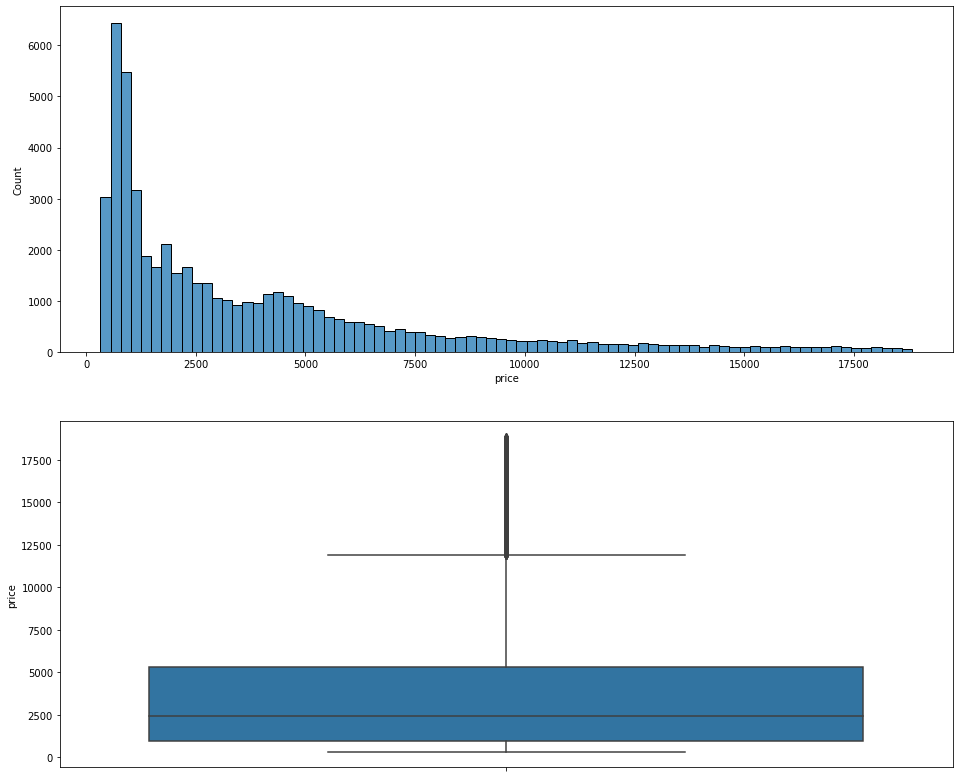

In [ ]:
fig,ax= plt.subplots(2,1,figsize=(16,14))
sns.histplot(df['price'],ax=ax[0])
sns.boxplot(y="price",data=df,ax=ax[1])

Através do histograma e boxplot podemos compreender melhor a distribuição dos preços. Temos um histograma assimétrico à direita, significando que a maior parte dos preços se encontram próximo ao limite inferior. Porém, vemos que há diamantes com preços bastante elevados e que se comportam como outliers, estando acima do limite máximo no boxplot.

In [ ]:
df.cut.value_counts()

Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: cut, dtype: int64

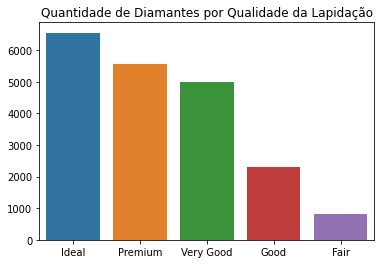

In [ ]:
plt.title("Quantidade de Diamantes por Qualidade da Lapidação")
sns.barplot(x=df.cut.value_counts().index, y=df.cut.value_counts().values);

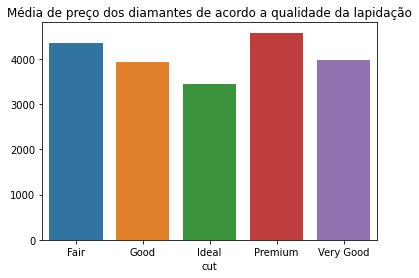

In [ ]:
plt.title("Média de preço dos diamantes de acordo a qualidade da lapidação")
sns.barplot(x=df.groupby('cut').price.mean().index,
            y=df.groupby('cut').price.mean().values)

Observando os gráficos, vemos que a maior parte dos diamantes apresentam a qualidade 'Ideal' e que diamantes dessa qualidade tem a menor média de preço, por volta de $3800. Assim, entedemos que a média de preço dos diamantes é igual a 3932,73 porque é bastante influencida pela média de preço dos diamantes de qualidade 'Ideal'.

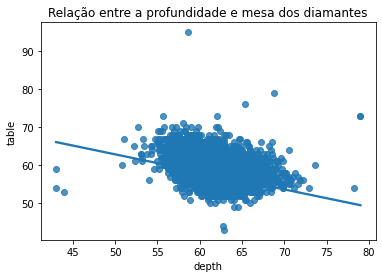

In [ ]:
plt.title("Relação entre a profundidade e mesa dos diamantes")
sns.regplot(x=df['depth'],y=df['table'])

Aqui temos uma relação linear negativa entre as variáveis, ou seja, enquanto uma aumenta a outra diminui. Uma mesa (table) maior, significa que o diamante tem uma maior largura, e como no cálculo do depth a largura está no denominador, logo o gráfico nos apresenta uma informação condizente.

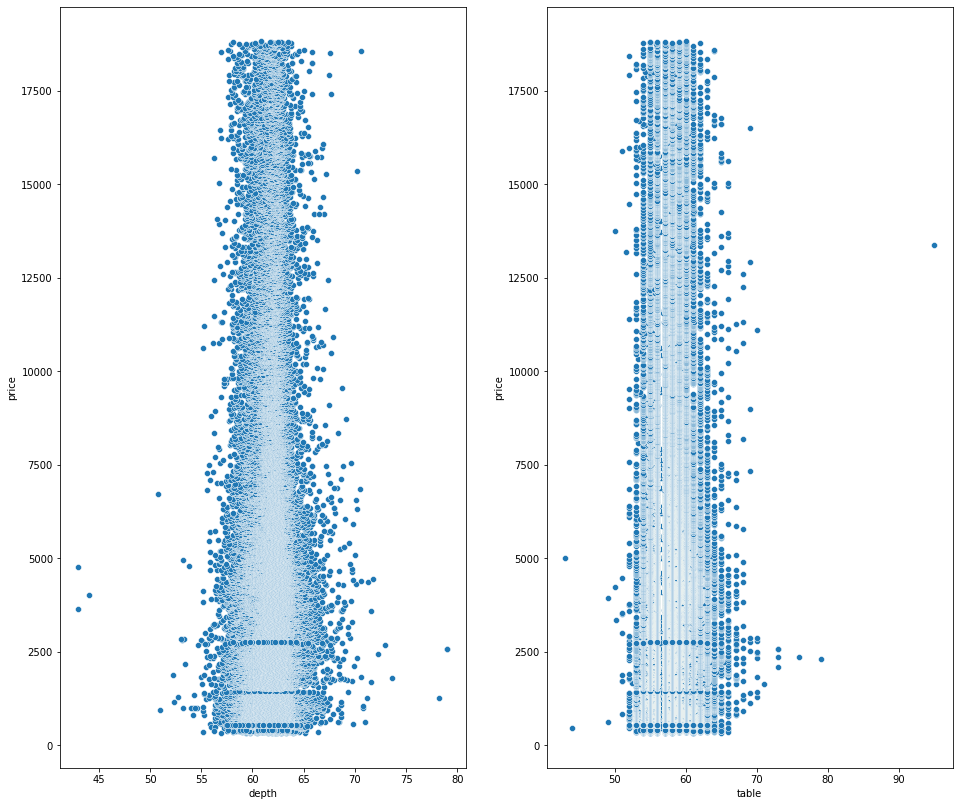

In [ ]:
fig,ax= plt.subplots(1,2,figsize=(16,14))
sns.scatterplot(x="depth",y="price",data=df,ax=ax[0])
sns.scatterplot(x="table",y="price",data=df,ax=ax[1])

Através dos gráficos podemos notar que, para as as duas variáveis x (depth e table), os dados tem pouca variação com relação à média. Também constatamos que não há relação linear em nenhum dos gráficos, ou seja, as variáveis depth e table não influenciam no preço do diamante.

In [7]:
import plotly.express as px

In [ ]:
fig = px.scatter(df, x="carat", y="price", color="cut",width=1000,height=800)
fig.show()

Através do gráfico verificamos que há uma relação linear positiva entre as variáveis carat e price, ou seja, as duas aumentam no mesmo sentido. Vemos que a grande parte dos dados está compreendida entre 0,5 e 1,5 carat, aproximadamente.
Também podemos perceber que não há uma discrepancia dos valores com relação a lapidação, ou seja, a qualidade da lapidação não incluencia muito no preço e quilate do diamante.

In [ ]:
fig = px.strip(df, x="price", y="cut", orientation="h")
fig.show()

No gráfico acima comprovamos que a qualidade da lapidação não influencia de forma significativa no preço do diamante, já que as "barras" dos dados começam e terminam praticamente nos mesmos pontos.

In [ ]:
x= df.color.value_counts().values
color= df.color.value_counts().index
fig = px.funnel(df, x=x, y=color)
fig.show()

Através do gráfico de funil podemos ver como estão distribuidos os diamantes de acordo a cor. Quanto maior a letra, em ordem alfabética, mais claro o diamante. Vemos que os diamantes mais claros (I e J) estão presentes em menor quantidade na amostra.

In [ ]:
group=df.groupby('clarity').price.mean()
group=pd.DataFrame(group)
group['clarity']=group.index

In [ ]:
fig = px.treemap(group, path=['clarity'], values='price',title="Média de price por clarity",color='price')
fig.show()

Com o treemap vemos que a média de preço não é afetada significamente pela variável 'clarity', essa variável indica as inclusões ou manchas no diamante e segue a seguinte escala:

- Impecável (FL) Sem inclusões e sem manchas visíveis sob ampliação de 10x
- Internamente impecável (IF) Sem inclusões visíveis sob ampliação de 10x
- Muito, muito pouco incluído (VVS1 e VVS2) Inclusões tão pequenas que são difíceis para um avaliador habilidoso ver com ampliação de 10x
- Muito Ligeiramente Incluído (VS1 e VS2) As inclusões são observadas com esforço sob aumento de 10x, mas podem ser caracterizadas como menores
- Ligeiramente incluído (SI1 e SI2) As inclusões são perceptíveis sob ampliação de 10x
- Incluído (I1, I2 e I3) As inclusões são óbvias sob ampliação de 10x, o que pode afetar a transparência e o brilho.

Notamos que os VS1 e VS2 tem média de preço maior que o VVS1, o que significa que outras variáveis influenciam mais no preço, como carat e tamanho.



In [ ]:
group2=df.groupby('color').price.mean()
group2=pd.DataFrame(group2)
group2['color']=group2.index

In [ ]:
fig = px.treemap(group2, path=['color'], values='price',title="Média de price por color",color='price')
fig.show()

Observando o segundo treemap, notamos que a cor já influencia mais no preço que a variável 'clarity'. Vemos que a cor 'J' tem a maior média de preço já que apresenta um diamante mais claro.

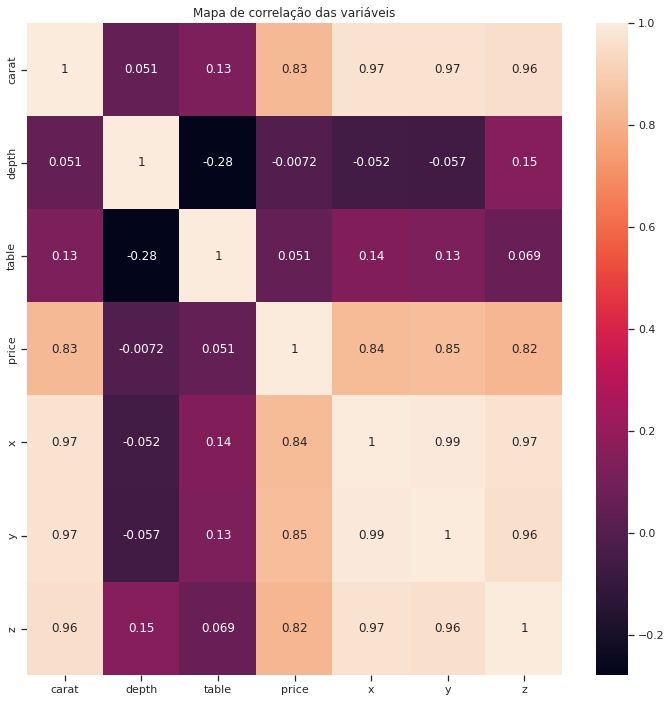

In [ ]:
plt.figure(figsize=(12,12))
plt.title("Mapa de correlação das variáveis")
sns.heatmap(data=df.corr(),annot=True);

Com o mapa de calor da correlação constatamos o que já tínhamos visto no gráfico de dispersão plotado anteriormente, as variáveis depth e table não tem correlação com o preço. Já a variável carat e as dimensões x,y e z apresentam uma correlação muito forte com o preço do diamante.

In [8]:
fig= px.scatter_matrix(df, dimensions=['x','y','z'],color="cut")
fig.show()

Um diamante para ser bem apreciado e ter o seu valor mais elevado, precisa apresentar uma boa simetria em relação as suas dimensões. Por isso vemos que há uma forte correlação entre as variáveis dimensão do diamante.

## **Conclusão**

- Constatamos que as variáveis categóricas pouco influenciam no preço do diamante, sendo a variável 'color' a que mais influencia dentre elas;
- As variáveis numéricas 'depth' e 'table' não tem correlação com a variável preço;
- As variáveis 'carat', 'x', 'y', e 'z' apresentam correlação forte com a variável preço.